In [1]:
import pandas as pd

## 8절. 기초 통계 분석


In [169]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 8.1. 최솟값, 최댓값, 평균, 중위수, 누적합

- DataFrame.min(axis =None, skipna=None, level = None, numeric_only=None,**kwargs)
    - skipna : True 이면 , NA, 또는 Null값을 계산에서 제외
- cumprod : 누적합 

In [54]:
iris.sepal_length.cumprod()

0       5.100000e+00
1       2.499000e+01
2       1.174530e+02
3       5.402838e+02
4       2.701419e+03
           ...      
145    1.507019e+111
146    9.494217e+111
147    6.171241e+112
148    3.826169e+113
149    2.257440e+114
Name: sepal_length, Length: 150, dtype: float64

In [175]:
iris.columns[0:4]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [168]:
for idx_ , col_name in enumerate( iris.columns[:4] ):
    print( iris.loc[ iris[col_name] == iris.max()[idx_] ] )

     sepal_length  sepal_width  petal_length  petal_width    species
131           7.9          3.8           6.4          2.0  virginica
    sepal_length  sepal_width  petal_length  petal_width species
15           5.7          4.4           1.5          0.4  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
118           7.7          2.6           6.9          2.3  virginica
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
109           7.2          3.6           6.1          2.5  virginica
144           6.7          3.3           5.7          2.5  virginica


In [171]:
iris[col_name]

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [50]:
iris.max()[idx_]

6.9

In [69]:
iris.min()

sepal_length       4.3
sepal_width          2
petal_length         1
petal_width        0.1
species         setosa
num                  0
dtype: object

In [32]:
iris.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [34]:
iris. mean(), iris.median()

(sepal_length    5.843333
 sepal_width     3.057333
 petal_length    3.758000
 petal_width     1.199333
 dtype: float64,
 sepal_length    5.80
 sepal_width     3.00
 petal_length    4.35
 petal_width     1.30
 dtype: float64)

### 8.2. 분산 , 표준 편차
- DataFrame.var(axis =None, skipna=None, level = None, ddof=1 numeric_only=None,**kwargs)
    - skipna : True 이면 , NA, 또는 Null값을 계산에서 제외
    - ddof: 델타 자유도 , 1 : 표본표준편차, 표본분산

In [35]:
iris.var(), iris.std()

(sepal_length    0.685694
 sepal_width     0.189979
 petal_length    3.116278
 petal_width     0.581006
 dtype: float64,
 sepal_length    0.828066
 sepal_width     0.435866
 petal_length    1.765298
 petal_width     0.762238
 dtype: float64)

### 8.3. 공분산 , 상관계수

In [36]:
iris.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [37]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### 8.4. 요약 통계량 

#### 1) 기본요약 통계량

In [38]:
iris.describe() # 숫자 데이터의 통계량만 출력됨 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
iris.species.describe() # 종 컬럼에 대한 요약 통계량 

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

#### 2) include와 exclude
- include 와 exclude를 이용해서 열을 제한 할수 있음
- 같은 유형을 사용하면 오류가 발생함 

In [41]:
df = pd.DataFrame({'a':[1,2]*3,
                  'b':[True,False]*3,
                  'c':[2.0,4.0]*3})
df

,a,b,c
0,1,True,2.0
1,2,False,4.0
2,1,True,2.0
3,2,False,4.0
4,1,True,2.0
5,2,False,4.0


In [43]:
df.describe()

,a,c
count,6.000000,6.000000
mean,1.500000,3.000000
std,0.547723,1.095445
min,1.000000,2.000000
25%,1.000000,2.000000
50%,1.500000,3.000000
75%,2.000000,4.000000
max,2.000000,4.000000


In [44]:
df.describe(include=["int64"]) # int64에 해당하는 데이터 자료만 출력해라

,a
count,6.000000
mean,1.500000
std,0.547723
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


In [45]:
df.describe(include=["bool","float64"])

,b,c
count,6,6.000000
unique,2,NaN
top,True,NaN
freq,3,NaN
mean,NaN,3.000000
std,NaN,1.095445
min,NaN,2.000000
25%,NaN,2.000000
50%,NaN,3.000000
75%,NaN,4.000000


In [55]:
df.describe(include="all")

,a,b,c
count,6.000000,6,6.000000
unique,NaN,2,NaN
top,NaN,True,NaN
freq,NaN,3,NaN
mean,1.500000,NaN,3.000000
std,0.547723,NaN,1.095445
min,1.000000,NaN,2.000000
25%,1.000000,NaN,2.000000
50%,1.500000,NaN,3.000000
75%,2.000000,NaN,4.000000


## 9절. 데이터 그룹화
### 9.1. group by
- 데이터를 구분할 수 있는 열의 값들을 이용하여 데이터를 여러 기준에 의해 구분하여 그룹화 한 후 기초 통계 함수 등을 적용 할수 있또록 함 

In [56]:
iris = sns.load_dataset("iris")

#### 1) 단일 열로 그룹화

In [59]:
iris_grouped = iris.groupby(by=iris.species)
iris_grouped

In [60]:
iris_grouped.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


#### 2) 다중 열로 그룹화

In [62]:
np.ravel([[i]*25 for i in range(6)])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [61]:
import numpy as np
iris["num"] = np.ravel([[i]*25 for i in range(6)])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [63]:
iris_grouped2 = iris.groupby(by=[iris.species,iris.num])
iris_grouped2.mean()

sepal_length  sepal_width  petal_length  petal_width
species    num                                                      
setosa     0           5.028        3.480         1.460        0.248
           1           4.984        3.376         1.464        0.244
versicolor 2           6.012        2.776         4.312        1.344
           3           5.860        2.764         4.208        1.308
virginica  4           6.576        2.928         5.640        2.044
           5           6.600        3.020         5.464        2.008

In [64]:
iris_grouped.describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_width        num                      \
                 count   mean  ...         75%  max count mean       std  min   
species                        ...                                              
setosa            50.0  3.428  ...         0.3  0.6  50.0  0.5  0.505076  0.0   
versicolor        50.0  2.770  ...         1.5  1.8  50.0  2.5  0.505076  2.0   
virginica         50.0  2.974  ...         2.3  2.5  50.0  4.5  0.505076  4.0   

                                
            25%  50%  75%  max  
species                         
setosa      0.0  0.5  1.0  1.0  
versicolor  2.0  2.5  3.0  3.0  
virginica   4.0  4.5  5.0  5.0  

[3 rows x 40 columns]

In [65]:
iris_grouped2.describe()

sepal_length                                            \
                      count   mean       std  min  25%  50%  75%  max   
species    num                                                          
setosa     0           25.0  5.028  0.400541  4.3  4.8  5.0  5.4  5.8   
           1           25.0  4.984  0.303699  4.4  4.8  5.0  5.2  5.5   
versicolor 2           25.0  6.012  0.547966  4.9  5.6  6.1  6.4  7.0   
           3           25.0  5.860  0.481318  5.0  5.5  5.7  6.1  6.8   
virginica  4           25.0  6.576  0.724155  4.9  6.3  6.5  7.1  7.7   
           5           25.0  6.600  0.548483  5.8  6.2  6.4  6.9  7.9   

               sepal_width         ... petal_length      petal_width         \
                     count   mean  ...          75%  max       count   mean   
species    num                     ...                                        
setosa     0          25.0  3.480  ...          1.5  1.9        25.0  0.248   
           1          25.0  3.376  ...          1.6  1.9        25.0  0.244   
versicolor 2          25.0  2.776  ...          4.7  4.9        25.0  1.344   
           3          25.0  2.764  ...          4.5  5.1        25.0  1.308   
virginica  4          25.0  2.928  ...          6.0  6.9        25.0  2.044   
           5          25.0  3.020  ...          5.7  6.4        25.0  2.008   

                                                   
                     std  min  25%  50%  75%  max  
species    num                                     
setosa     0    0.104563  0.1  0.2  0.2  0.3  0.5  
           1    0.108321  0.1  0.2  0.2  0.3  0.6  
versicolor 2    0.206317  1.0  1.3  1.4  1.5  1.8  
           3    0.191311  1.0  1.2  1.3  1.4  1.7  
virginica  4    0.255082  1.5  1.8  2.0  2.2  2.5  
           5    0.297097  1.4  1.8  2.0  2.3  2.5  

[6 rows x 32 columns]

### 9.2. 그룹간 반복 처리

In [70]:
iris = sns.load_dataset("iris")

In [73]:
iris_grouped = iris.groupby ( by =[iris.species])
iris_grouped

In [120]:
for name, subset in iris_grouped:
    print(name, "\n",subset.head())

setosa 
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
versicolor 
     sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor
53           5.5          2.3           4.0          1.3  versicolor
54           6.5          2.8           4.6          1.5  versicolor
virginica 
      sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7

### 9.3. 데이터프레임 그룹 인덱싱
- 데이터 프레임 그룹에서 인덱싱을 위해서는 take()함수 이용

In [121]:
iris = sns.load_dataset("iris")
iris_grouped = iris.groupby(by=iris.species)

In [144]:
iris_grouped.groups

{'setosa': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 'versicolor': Int64Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
             67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
             84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
            dtype='int64'),
 'virginica': Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
             113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
             126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
             139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
            dtype='int64')}

In [81]:
iris_grouped.take([0,2,4])

sepal_length  sepal_width  petal_length  petal_width
species                                                             
setosa     0             5.1          3.5           1.4          0.2
           2             4.7          3.2           1.3          0.2
           4             5.0          3.6           1.4          0.2
versicolor 50            7.0          3.2           4.7          1.4
           52            6.9          3.1           4.9          1.5
           54            6.5          2.8           4.6          1.5
virginica  100           6.3          3.3           6.0          2.5
           102           7.1          3.0           5.9          2.1
           104           6.5          3.0           5.8          2.2

In [82]:
iris_grouped.take(range(0,10,3))  # 연속적인 인덱스는 range() 사용가능 

sepal_length  sepal_width  petal_length  petal_width
species                                                             
setosa     0             5.1          3.5           1.4          0.2
           3             4.6          3.1           1.5          0.2
           6             4.6          3.4           1.4          0.3
           9             4.9          3.1           1.5          0.1
versicolor 50            7.0          3.2           4.7          1.4
           53            5.5          2.3           4.0          1.3
           56            6.3          3.3           4.7          1.6
           59            5.2          2.7           3.9          1.4
virginica  100           6.3          3.3           6.0          2.5
           103           6.3          2.9           5.6          1.8
           106           4.9          2.5           4.5          1.7
           109           7.2          3.6           6.1          2.5

## 10절 . 데이터 구조 변경
### 10.1. 와이드 포맷과 롱 포맷 
#### 1) 와이드 포맷 : 피벗 테이블
#### 2) 롱포맷 : 언피벗 테이블
#### 3) 샘플 데이터 : 뉴욕데이터 패키지


In [86]:
# 데이터 패키지를 불러오기
import statsmodels.api as sm
airquality_data = sm.datasets.get_rdataset("airquality")
airquality = airquality_data.data

In [93]:
airquality # 피벗 테이블로 되어있음. 

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


### 10.2. melt를 이용한 언피벗팅

In [91]:
airqulity_melted = airquality.melt(id_vars=["Month","Day"])

# month 와 day를 제외한 나머지는 값으로 바뀜.
# 달과 날짜에 대한 나머지값들의 나열 .

In [101]:
airqulity_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [92]:
airqulity_melted.tail()

,Month,Day,variable,value
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0
611,9,30,Temp,68.0


### 10.3. pivot_table을 이용한 피벗팅

In [139]:
airquality2 = airqulity_melted.pivot_table(index=["Month","Day"], #인덱스로 지정할 컬럼
                                           columns=["variable"], # 열 이름 지정 
                                          values = ["value"]) # 새로운 데이터 프레임값으로 사용할 변수 이름.
airquality2
# aggfunc의 기본값은 mean이다.

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3
...         ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5

[153 rows x 4 columns]

In [140]:
airquality2.reset_index(col_level=1,inplace=True)
airquality2.columns = airquality2.columns.droplevel(level = 0)
airquality2.columns.name =None

# 그냥 인덱스와 컬럼들의 레벨을 정리하는 코드들. 

In [141]:
airquality2.head()

,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


In [100]:
airquality2.tail()

,Month,Day,Ozone,Solar.R,Temp,Wind
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0
152,9,30,20.0,223.0,68.0,11.5


### 11절. 데이터프레임에 함수적용하기
#### 11.1. apply : df와 시리즈에 함수를 적용함

In [142]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [145]:
iris_x = iris.iloc[:,:-1] # x 축으로 나누기 
iris_x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [84]:
iris_x.apply(round).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0


In [148]:
iris_x.apply(sum)

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
dtype: float64

In [149]:
iris_x.apply(sum,axis =1) # 행 별 합계 출력

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [151]:
iris_x_mean = iris_x.mean()
iris_x_mean

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [152]:
iris_x.apply(lambda x : x-iris_x_mean, axis=1).head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333


In [153]:
iris_x.apply(lambda x : list(x-iris_x_mean),axis =1 ).head()

0    [-0.743333333333335, 0.4426666666666659, -2.35...
1    [-0.9433333333333342, -0.057333333333334124, -...
2    [-1.1433333333333344, 0.14266666666666605, -2....
3    [-1.243333333333335, 0.042666666666665964, -2....
4    [-0.8433333333333346, 0.542666666666666, -2.35...
dtype: object

In [155]:
iris_x.apply(lambda x : list(x-iris_x_mean),axis =1 , result_type = "broadcast").head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333


### 11.2. applymap 
- 각 요소별 작동하는 함수

In [156]:
iris_x.applymap(np.sum).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 11.3. map

In [160]:
sepal_length = iris.sepal_length
isinstance(sepal_length, pd.Series)

True

In [161]:
sepal_length.map(lambda x : (x, round(x))).head()

0    (5.1, 5)
1    (4.9, 5)
2    (4.7, 5)
3    (4.6, 5)
4    (5.0, 5)
Name: sepal_length, dtype: object

In [162]:
s = pd.Series([1,2,3,None])
s

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [164]:
s.map(lambda x : (x,x**2))

0    (1.0, 1.0)
1    (2.0, 4.0)
2    (3.0, 9.0)
3    (nan, nan)
dtype: object

In [165]:
s.map(lambda x : (x,x**2), na_action="ignore")
 # na_action="ignore" 일경우 결과가 NaN 값이 됨. 

0    (1.0, 1.0)
1    (2.0, 4.0)
2    (3.0, 9.0)
3           NaN
dtype: object

## 12절. 결측치 처리 및 변경하기
### 12.1. 실습을 위한 데이터

In [166]:
iris_x = iris.iloc[:,:-1]

In [176]:
import random 
random.seed(1)
for col in range(4):
    iris_x.iloc[[random.sample(range(len(iris)),20)],col] = float('nan')

In [199]:
random.seed(1)
random.sample(range(len(iris)),20)

[34,
 145,
 16,
 65,
 30,
 126,
 115,
 120,
 97,
 53,
 24,
 124,
 7,
 99,
 110,
 0,
 114,
 68,
 58,
 26]

In [179]:
iris_x

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,NaN,1.3,0.2
3,4.6,3.1,1.5,NaN
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,NaN,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,NaN


### 12.2. dropna
- 결측치를 포함한 행 또는 열을 제거함.
- axis = 0이면 행 1 이면 열 제거

In [200]:
iris_x.dropna().head()

,sepal_length,sepal_width,petal_length,petal_width
1,4.9,3.0,1.4,0.2
4,5.0,3.6,1.4,0.2
9,4.9,3.1,1.5,0.1
10,5.4,3.7,1.5,0.2
12,4.8,3.0,1.4,0.1


In [201]:
iris_x.dropna(thresh=2).head()# na가 아닌 요소가 최소 2개 이상이면 삭제하지 않음

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,NaN,1.3,0.2
3,4.6,3.1,1.5,NaN
4,5.0,3.6,1.4,0.2


In [203]:
iris_x.dropna(subset=['sepal_length','sepal_width']).head()
# subset에 지정한 열이 na일경우  행삭제 

,sepal_length,sepal_width,petal_length,petal_width
1,4.9,3.0,1.4,0.2
3,4.6,3.1,1.5,NaN
4,5.0,3.6,1.4,0.2
8,4.4,2.9,NaN,0.2
9,4.9,3.1,1.5,0.1


In [204]:
iris_x.dropna(inplace=True)
iris_x.head(10) # 누락된 값을 제거하고 현재 데이터 프레임이 변경

,sepal_length,sepal_width,petal_length,petal_width
1,4.9,3.0,1.4,0.2
4,5.0,3.6,1.4,0.2
9,4.9,3.1,1.5,0.1
10,5.4,3.7,1.5,0.2
12,4.8,3.0,1.4,0.1
13,4.3,3.0,1.1,0.1
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
17,5.1,3.5,1.4,0.3
18,5.7,3.8,1.7,0.3


### 12.3 fillna 

In [218]:
iris_x = iris.iloc[:,:-1]
import random 
random.seed(1)
for col in range(4):
    iris_x.iloc[[random.sample(range(len(iris)),20)],col] = float('nan')

In [209]:
# 모든 nan을 0으로 채움 
iris_x.fillna(0).head() # iris_x.fillna(value=0).head() 와 같음..

,sepal_length,sepal_width,petal_length,petal_width
0,0.0,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,0.0,1.3,0.2
3,4.6,3.1,1.5,0.0
4,5.0,3.6,1.4,0.2


In [210]:
# 널이 아닌 이전 또는 이후의 값을  이용해 값을 채움
# ffiill은 이전의 널이 아닌 값을 이용해 채움 
iris_x.fillna(method="ffill").head()

# method : bfill / ffill/ pad/ backfill/ none 기본값은 none

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.0,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [215]:
import numpy as np
np.round(iris_x.mean(),1)

In [222]:
# 평균값으로 대체
iris_x.fillna(value= np.round(iris_x.mean(),1)).head(15)

,sepal_length,sepal_width,petal_length,petal_width
0,5.8,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.1,1.3,0.2
3,4.6,3.1,1.5,1.2
4,5.0,3.6,1.4,0.2
5,5.4,3.1,1.7,0.4
6,4.6,3.1,1.4,0.3
7,5.8,3.1,1.5,1.2
8,4.4,2.9,3.7,0.2
9,4.9,3.1,1.5,0.1


In [221]:
# limit 대체할 na의 갯수를 지정 
iris_x.fillna(value=np.round(iris_x.mean(),1),limit =2).head(15)

,sepal_length,sepal_width,petal_length,petal_width
0,5.8,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.1,1.3,0.2
3,4.6,3.1,1.5,1.2
4,5.0,3.6,1.4,0.2
5,5.4,3.1,1.7,0.4
6,4.6,NaN,1.4,0.3
7,5.8,NaN,1.5,1.2
8,4.4,2.9,3.7,0.2
9,4.9,3.1,1.5,0.1


### 12.4. replace

In [223]:
iris_x = iris.iloc[:,:-1]
import random 
random.seed(1)
for col in range(4):
    iris_x.iloc[[random.sample(range(len(iris)),20)],col] = float('nan')

In [224]:
iris_x.replace(float('nan'),10).head()

,sepal_length,sepal_width,petal_length,petal_width
0,10.0,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,10.0,1.3,0.2
3,4.6,3.1,1.5,10.0
4,5.0,3.6,1.4,0.2


In [226]:
# 시리즈 객체에서 5와 4,6을 이후의 5 또는 4.6이 아닌 값을 이용해서 바꿈
# method : bfill / ffill/ pad/ backfill/ none 기본값은 none

iris_x.sepal_length.replace([5,4.6],method='bfill').head(10) #몰라

0    NaN
1    4.9
2    4.7
3    5.4
4    5.4
5    5.4
6    NaN
7    NaN
8    4.4
9    4.9
Name: sepal_length, dtype: float64

In [227]:
# 정규표현식을 이용해서 바꿀값을 지정할 수 있음. regex =True 추가
# r : 들어가면, ow 라는 의미로 있는 문자를 있는 그대로 해석해라 라는 뜻 

iris.replace(r"^se[a-z]*","set",regex= True).head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,set
1,4.9,3.0,1.4,0.2,set
2,4.7,3.2,1.3,0.2,set
3,4.6,3.1,1.5,0.2,set
4,5.0,3.6,1.4,0.2,set


In [228]:
iris.replace(regex=r"^se[a-z]*",value="set").head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,set
1,4.9,3.0,1.4,0.2,set
2,4.7,3.2,1.3,0.2,set
3,4.6,3.1,1.5,0.2,set
4,5.0,3.6,1.4,0.2,set


In [5]:
df=pd.DataFrame({'a':[0,1,2,3,4],
                'b':[5,6,7,8,9],
                'c':['a','b','c','d','e']})
df

,a,b,c
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [6]:
df.replace([0,1,2,3],4) # 데이터프레임의 모든 0,1,2,3 을 4로 바꿈

,a,b,c
0,4,5,a
1,4,6,b
2,4,7,c
3,4,8,d
4,4,9,e


In [8]:
df.replace([0,1,2,3],[4,3,2,1]) # 0,1,2,3 을 각각 4,3,2,1 로 바꿈

,a,b,c
0,4,5,a
1,3,6,b
2,2,7,c
3,1,8,d
4,4,9,e


In [10]:
df.replace({0:10,1:100}) # 딕셔너리형식으로 지정 - 0값은 10으로 1값은 100으로 바꿈

,a,b,c
0,10,5,a
1,100,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [12]:
df.replace({'a':0,"b":5},100) # a의 0값과  b열의 5값을 100으로 바꿈

,a,b,c
0,100,100,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [14]:
df.replace({'a':{0:100,4:400}}) # a 열의 0은 100으로 4는 400으로 바꿈

,a,b,c
0,100,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,400,9,e


In [17]:
df=pd.DataFrame({'a':['bat','foo','bait'],
                'b':['abc','bar','xyz']})
df

,a,b
0,bat,abc
1,foo,bar
2,bait,xyz


In [20]:
df.replace(to_replace=r'^ba.$',value='new',regex=True)

,a,b
0,new,abc
1,foo,new
2,bait,xyz


In [21]:
df.replace({'a':r'^ba.$'},{'a':'new'},regex=True)
# a 에서 ba로 시작하는 문자를 new에 바꿔줌

,a,b
0,new,abc
1,foo,bar
2,bait,xyz


In [22]:
df.replace(regex=r'^ba.$',value='new')

,a,b
0,new,abc
1,foo,new
2,bait,xyz


In [23]:
df.replace(regex={r'^ba.$':'new','foo':'xyz'})

,a,b
0,new,abc
1,xyz,new
2,bait,xyz


In [24]:
df.replace(regex=[r'^ba.$','foo'],value='new')

,a,b
0,new,abc
1,new,new
2,bait,xyz


In [29]:
s =pd.Series([10,'a','a','b','b'])

to_replace()의 매개변수 특성을 이해하려면, s.replace({'a':None})와 
s.replace('a',None)의 동작을 비교 /이해해야함.  # 몰라

In [27]:
# s.replace(to_replace={'a':None},value =None, method=None)와 같음
s.replace({'a':None})

0      10
1    None
2    None
3       b
4       b
dtype: object

In [28]:
# s.replace(to_replace='a':,value =None, method='pad')와 같음
s.replace('a',None)

0    10
1    10
2    10
3     b
4     b
dtype: object

### 12.5.where 
- where() 함수 : 하나 이상의조건에 대한 데이터 프레임을 확인하고 그에 따라 결과를 반환 하는데 사용 
- if/ elif 구문을 대체할 수 있음. 데이터 프레임의 각 요소에 대해 cond매개 변수 값이 True이면 해당 요소가 사용됨. 

In [30]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_x = iris.iloc[:,:-1]

In [32]:
iris_x.where(iris_x>5).head()
# 5보다 크면 값을 반환하고 아니면 nan를 반환

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [33]:
iris_x.where(iris_x>5, other=0).head()
# 5보다 큰 값은 반환하고 그렇지 않을 경우 0을 반환

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


DataFrame.where() 은 numpy.where() 와 사용방법이 다름. 

df1.where(m,df2) 는 np.where(m.df1,df2) 와 동일

In [36]:
import numpy as np

In [37]:
"""0부터 10까지 데이터를 이용해 2열짜리 데이터 프레임을 만들고 
데이터 프레임의 값이 3으로 나눈 나머지가 0인 경우 그 값을 반환하며 
그렇지 않으면 해당값을 음수로 반환"""

df = pd.DataFrame(np.arange(10).reshape(-1,2),columns=['a','b'])
m = df%3 == 0
df.where(m, -df) 

# m 이 참이며  m 그대로 반환하고 아니면 -를 붙여서 값을 반환해준다. 

# reshape : -1 은 나머지 것을 알아서 배열해주는 것을 의미함. 

,a,b
0,0,-1
1,-2,3
2,-4,-5
3,6,-7
4,-8,9


In [41]:
df.where(m,-df)  == np.where(m,df,-df)
    
# 넘파이와 데이터 프레임을 비교한것. 

,a,b
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


In [43]:
df.where(m, -df) == df.mask(~m,-df)

# where 와 mask() 함수를 비교한 것. 
# mask() 함수의 조건에 not(~) 연산자가 붙어있응 것을 확인하기. 
# 마스크 함수를 모르는데 알고싶지않음.. 알아야하는것일까?......

,a,b
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


### 12.6 . astype

In [44]:
iris_x = iris.iloc[:,:-1]

iris_x.astype(int).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5,3,1,0
1,4,3,1,0
2,4,3,1,0
3,4,3,1,0
4,5,3,1,0


In [46]:
iris_x.astype({"sepal_length":int,"sepal_width":int}).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5,3,1.4,0.2
1,4,3,1.4,0.2
2,4,3,1.3,0.2
3,4,3,1.5,0.2
4,5,3,1.4,0.2


## 13절. 시리즈
### 13.1. 시리즈 만들기
#### 1) 리스트로 시리즈 객체 생성

In [49]:
from pandas import Series, DataFrame
fruits = Series([2500,3800,1200,6000],
               index = ['apple','banana','pear','cherry'])

print(fruits)

apple     2500
banana    3800
pear      1200
cherry    6000
dtype: int64


In [50]:
print(fruits.values)

[2500 3800 1200 6000]


In [51]:
print(fruits.index)

Index(['apple', 'banana', 'pear', 'cherry'], dtype='object')


#### 2) 딕셔너리로 시리즈 객체 생성

In [52]:
fruits_dic = {'apple':2500,'banana':3800, 'pear':1200,'cherry':6800}
fruits = Series(fruits_dic)

In [53]:
type(fruits_dic)

dict

In [54]:
type(fruits)

pandas.core.series.Series

In [57]:
fruits = Series([2500,3800,1200,6000],
               index = ['apple','banana','pear','cherry'])
fruits.name = 'fruitsPrice' #벨류 네임 지정 
fruits.index.name='fruitsName'
print(fruits)

# 인덱스와 벨류의 이름을 지정하는 예


fruitsName
apple     2500
banana    3800
pear      1200
cherry    6000
Name: fruitsPrice, dtype: int64


### 13.2. 시리즈 데이터 삭제하기

In [59]:
fruits = Series([2500,3800,1200,6000],
               index = ['apple','banana','pear','cherry'])

In [61]:
new_fruits = fruits.drop("banana")
print(new_fruits)

apple     2500
pear      1200
cherry    6000
dtype: int64


### 13.3 시리즈에서 요소 추출하기

In [62]:
fruits = Series([2500,3800,1200,6000],
               index = ['apple','banana','pear','cherry'])
fruits['apple':'pear']

apple     2500
banana    3800
pear      1200
dtype: int64

### 13.4 시리즈 데이터의 기본연산

In [63]:
fruits1 = Series([5,9,10,3],index = ['apple','banana','pear','cherry'])
fruits2 = Series([3,2,9,5,10],index = ['apple','orange','banana','cherry','mango'])

In [65]:
fruits1 + fruits2 # 인덱스의 의해 연산됨. 교집하지 않은 인덱스는 NAN이 됨. 

apple      8.0
banana    18.0
cherry     8.0
mango      NaN
orange     NaN
pear       NaN
dtype: float64

### 13.5. 시리즈 데이터의 정렬

In [66]:
fruits = Series([2500,3800,1200,6000],
               index = ['apple','banana','pear','cherry'])

In [67]:
fruits.sort_values(ascending=False)

cherry    6000
banana    3800
apple     2500
pear      1200
dtype: int64

### 13.6. 시리즈를 데이터 프레임으로

In [73]:
fruits1.to_frame()

,0
apple,5
banana,9
pear,10
cherry,3


In [68]:
fruits1.to_frame().T   # T 속성 

,apple,banana,pear,cherry
0,5,9,10,3


In [72]:
fruits1.to_frame().transpose() # 전치행렬을 반환

,apple,banana,pear,cherry
0,5,9,10,3


## 14절. 시각화

In [75]:
import seaborn as nsn
iris = sns.load_dataset("iris")

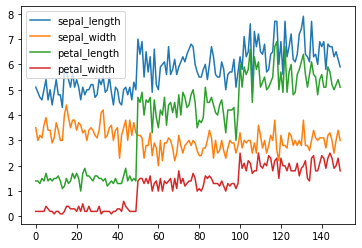

In [76]:
iris.plot()

In [78]:
iris.corr()

# 꽃잎의 길이와 꽃잎의 너비가 상관계수가 크다

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


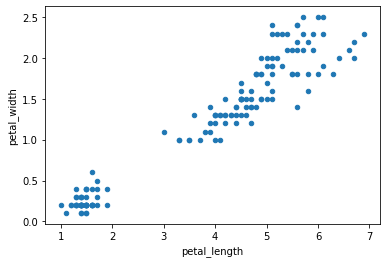

In [80]:
iris.plot(x= "petal_length", y = "petal_width",kind="scatter")

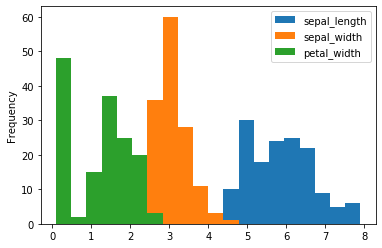

In [83]:
iris.plot(x="petal_length",kind="hist",bins=20)

# 히스토그램은 어떠한 변수에 대해서 구간별 빈도수를 나타낸 그래프 
# bins 구간의 개수를 지정

## 15절 연습문제
### 15.1. 실습형
#### 1) 문제

In [85]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [86]:
# 1. 처음 다섯행

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [99]:
# 2. 
iris_x = iris.iloc[:,:-1]
iris_y = iris.iloc[:,-1]
iris_y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [102]:
# 3
temp = iris.iloc[:50]
temp.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [143]:
temp.describe(include="all")
temp.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [142]:
#5.

iris_versicolor = iris[iris.loc[:,"species"]== 'versicolor']
iris_versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [116]:
# 6.

iris_df = pd.concat([iris_x,iris_y], axis =1)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [117]:
iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [118]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [147]:
a = iris_x.apply(lambda x : x - iris.mean(),axis=1)
a.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333


In [122]:
grouped = iris.groupby(by = iris.species)
grouped.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [156]:
# 11. 

a = iris.groupby(by = iris.species).mean()

b = iris.apply(lambda x : x - a.loc[x.species,:], 
               axis=1).iloc[[0,1,2,50,51,52,100,101,102],:-1]
b

,petal_length,petal_width,sepal_length,sepal_width
0,-0.062,-0.046,0.094,0.072
1,-0.062,-0.046,-0.106,-0.428
2,-0.162,-0.046,-0.306,-0.228
50,0.440,0.074,1.064,0.430
51,0.240,0.174,0.464,0.430
52,0.640,0.174,0.964,0.330
100,0.448,0.474,-0.288,0.326
101,-0.452,-0.126,-0.788,-0.274
102,0.348,0.074,0.512,0.026


In [163]:
iris.loc[iris.species,:]

KeyError: "None of [Index(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',\n       'setosa', 'setosa', 'setosa',\n       ...\n       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',\n       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],\n      dtype='object', length=150)] are in the [index]"